<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster urban locations based on their mobility structrue (%% of trips by each mobility mode within the total trips per location)

In [ ]:
# Import the pandas library using the alias 'pd'
import pandas as pd
#Upload the main dataset
SMdata=pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/Socio-mobility.csv",index_col=0)

In [ ]:
#rename some of the columns for the sake of consistency and also to replace '-'
SMdata.rename(columns={'mobile-device_spatial':'mobile','citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi'},inplace=True)


In [ ]:
#also upload two other datasets from the last class - residential and working population
LEHDW=pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LEHD-work.csv",index_col=0)

In [ ]:
#notice that residetial population here (from LEHD, based on the workforce residences)
#is different from the one in the main dataset
LEHDR=pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LEHD-resident.csv",index_col=0)

In [ ]:
# Import the pandas library using the alias 'pd'
import pandas as pd
#Upload the main dataset
SMdata=pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/Socio-mobility.csv",index_col=0)

#rename some of the columns for the sake of consistency and also to replace '-'
SMdata.rename(columns={'mobile-device_spatial':'mobile','citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi'},inplace=True)

#also upload two other datasets from the last class - residential and working population
LEHDW=pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LEHD-work.csv",index_col=0)

#notice that residetial population here (from LEHD, based on the workforce residences)
#is different from the one in the main dataset
LEHDR=pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LEHD-resident.csv",index_col=0)


#merge the dataframes (inner merge on index - taxi zone number); take only the columns to use later
# The original code tried to select a column named 'twitter' which doesn't exist in the DataFrame.
# Replacing 'twitter' with 'twitter_spatial' which is the correct column name in the dataset.
SMdata=SMdata[['population','mobile','citibike','sr311','subway','taxi','twitter_spatial']].merge(LEHDW[['total']].rename(columns={'total':'working'}),
                                                                                       left_index=True, right_index=True)
# Rename the 'twitter_spatial' column to 'twitter' if desired.
SMdata.rename(columns={'twitter_spatial': 'twitter'}, inplace=True)

In [ ]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [ ]:
#glimpse into the final data
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
tz,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318
5,26482.0,56271,0,490,0.0,3667,40,1191,10751
6,15896.0,147674,0,255,0.0,7456,88,2495,6729
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048


In [ ]:
!pip install geopandas
import geopandas as gpd  # Import geopandas with the alias 'gpd'

#read shapefiles of NYC taxi zones
tzs=gpd.read_file("https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=GeoJSON")
tzs.location_id = tzs.location_id.astype(int)
tzs.shape_area = tzs.shape_area.astype(float)

In [ ]:
tzs.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.695, -74.18449 40..."
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


In [ ]:
tzs=tzs.merge(SMdata,left_on='location_id', right_index=True, how='inner')

In [ ]:
ML=SMdata.columns

In [ ]:
ML

Index(['population', 'mobile', 'citibike', 'sr311', 'subway', 'taxi',
       'twitter', 'working', 'residential'],
      dtype='object')

In [ ]:
#pip install mapclassify

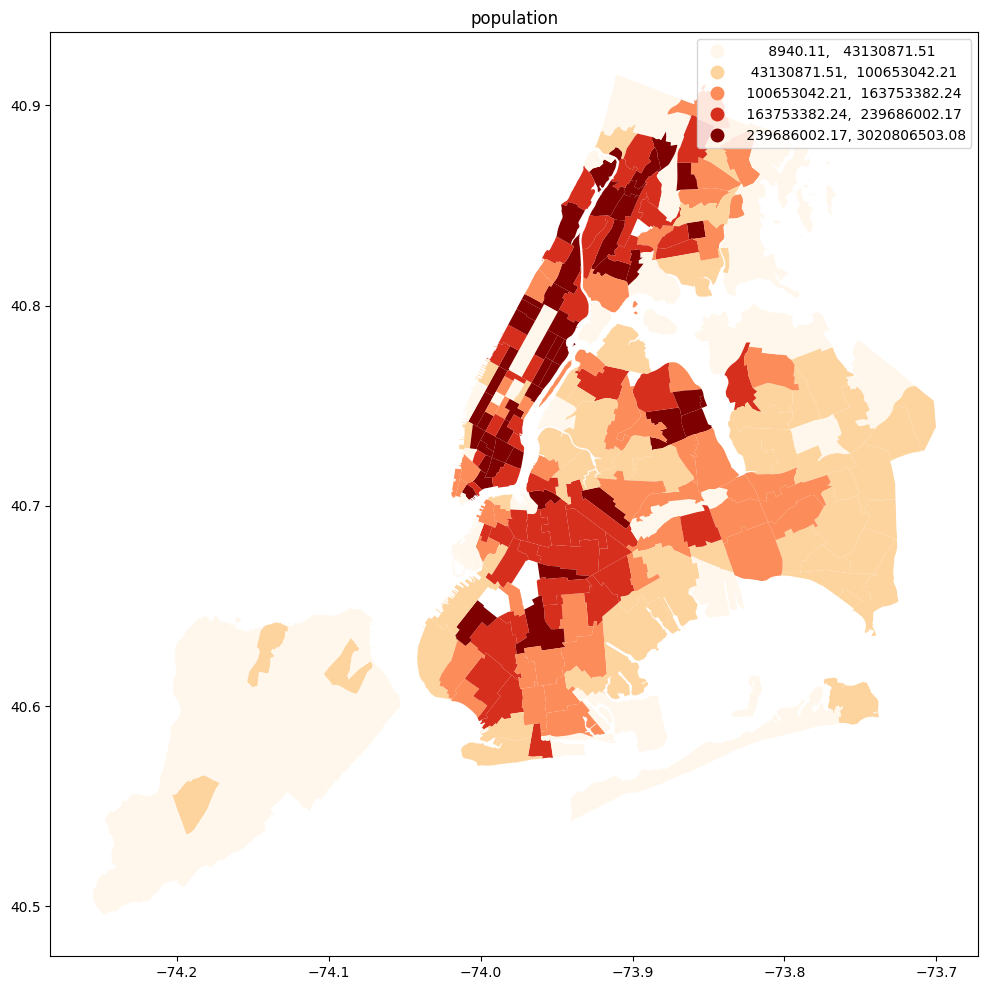

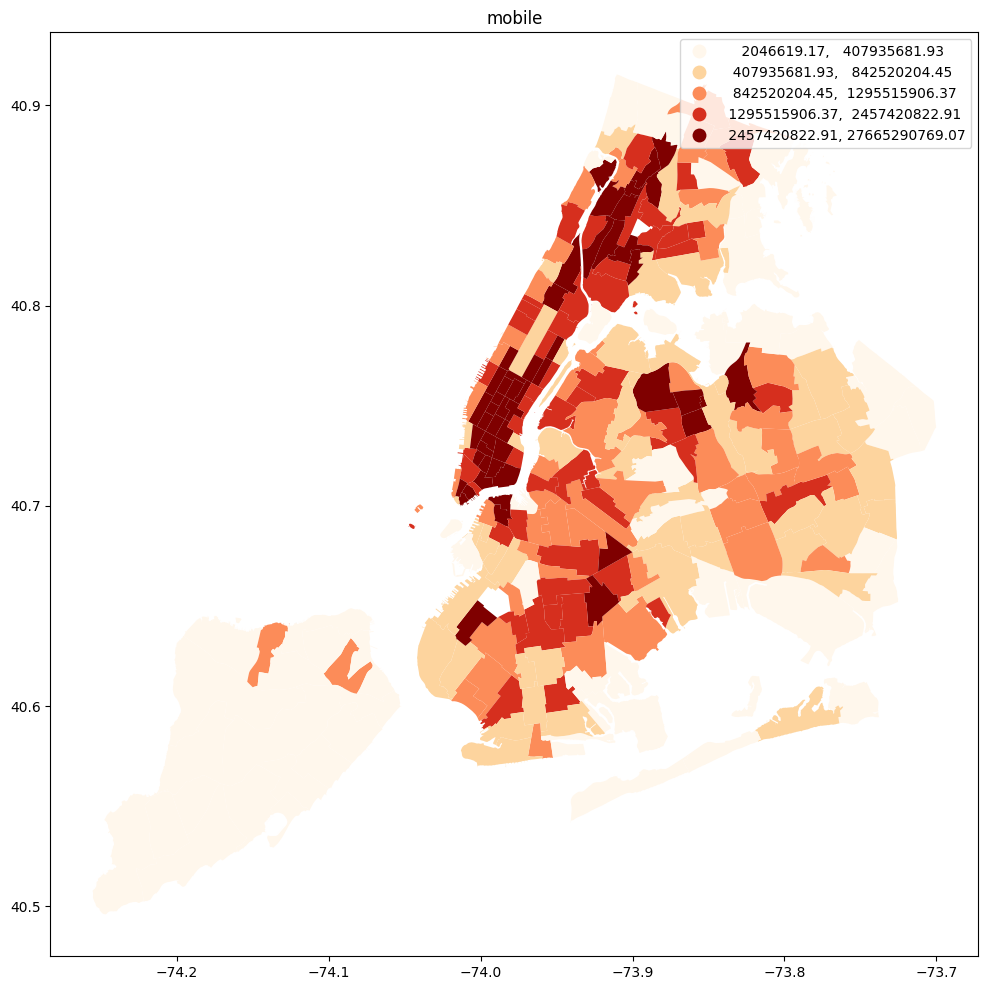

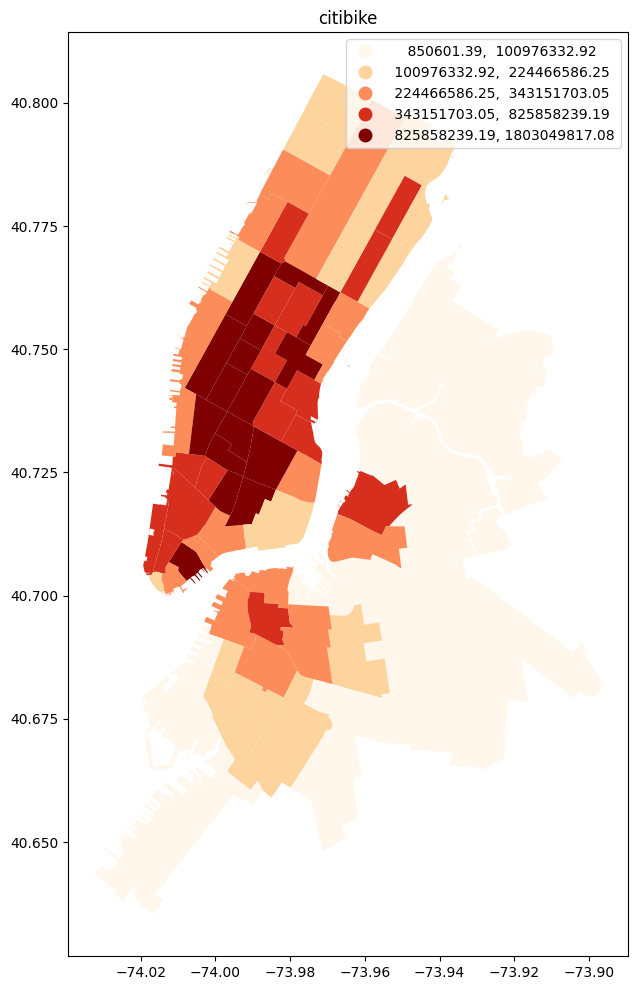

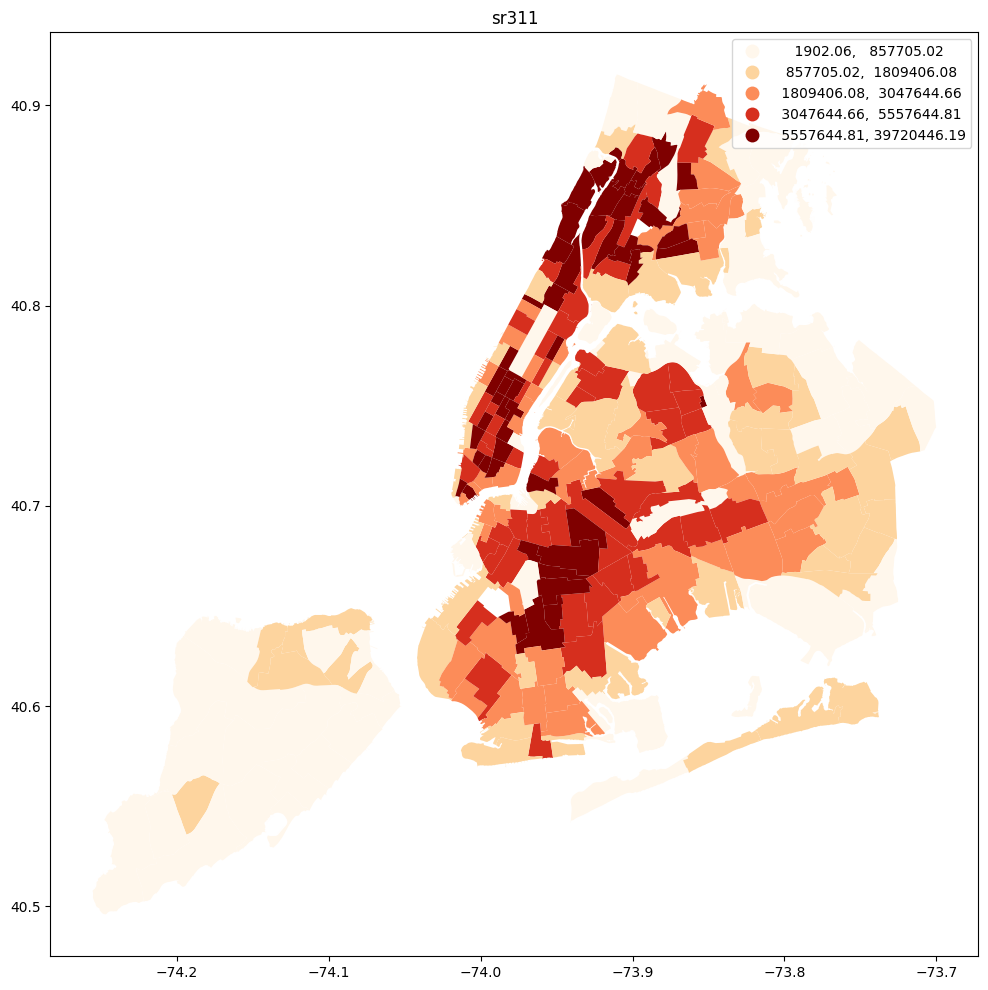

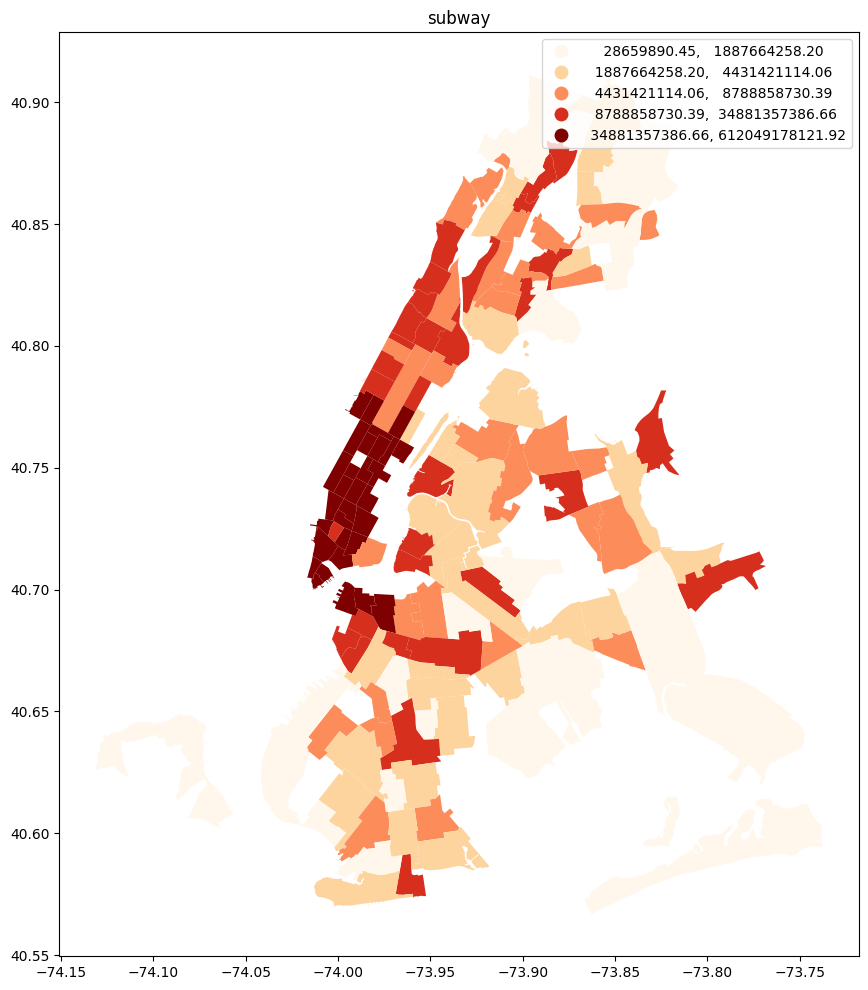

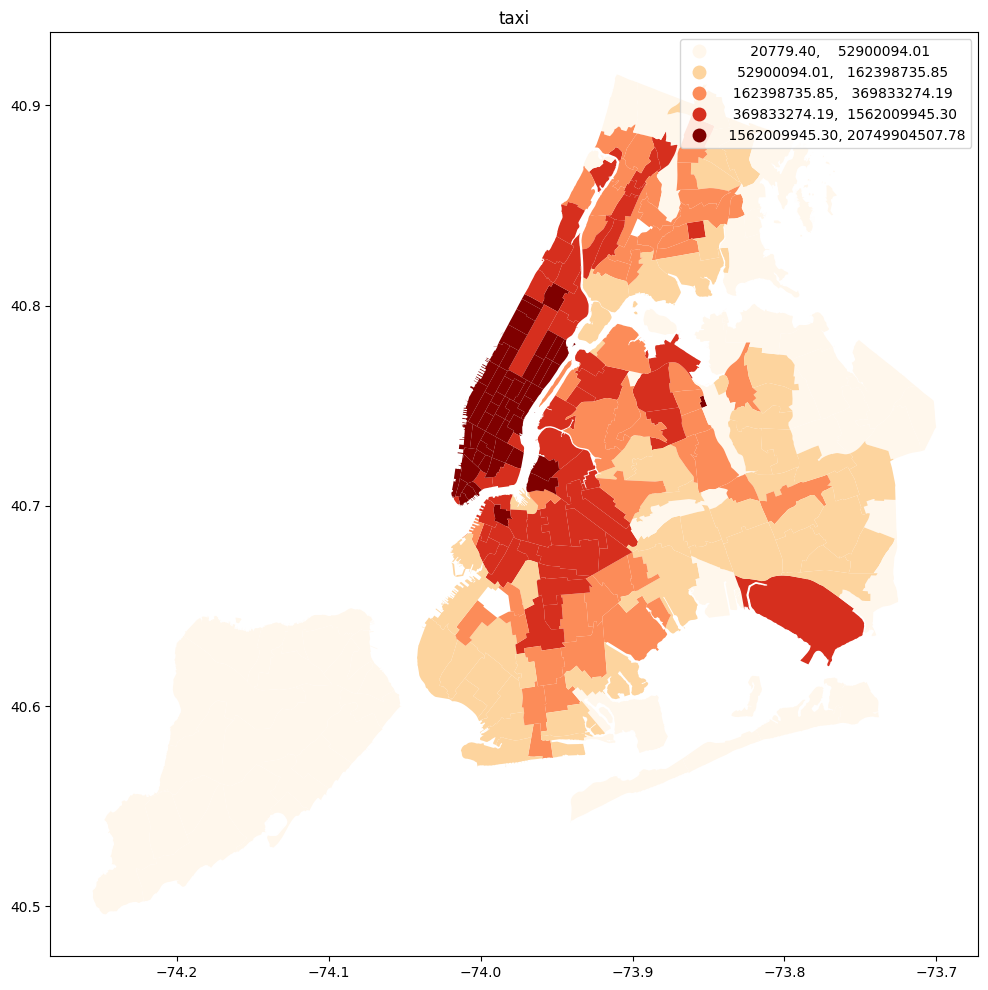

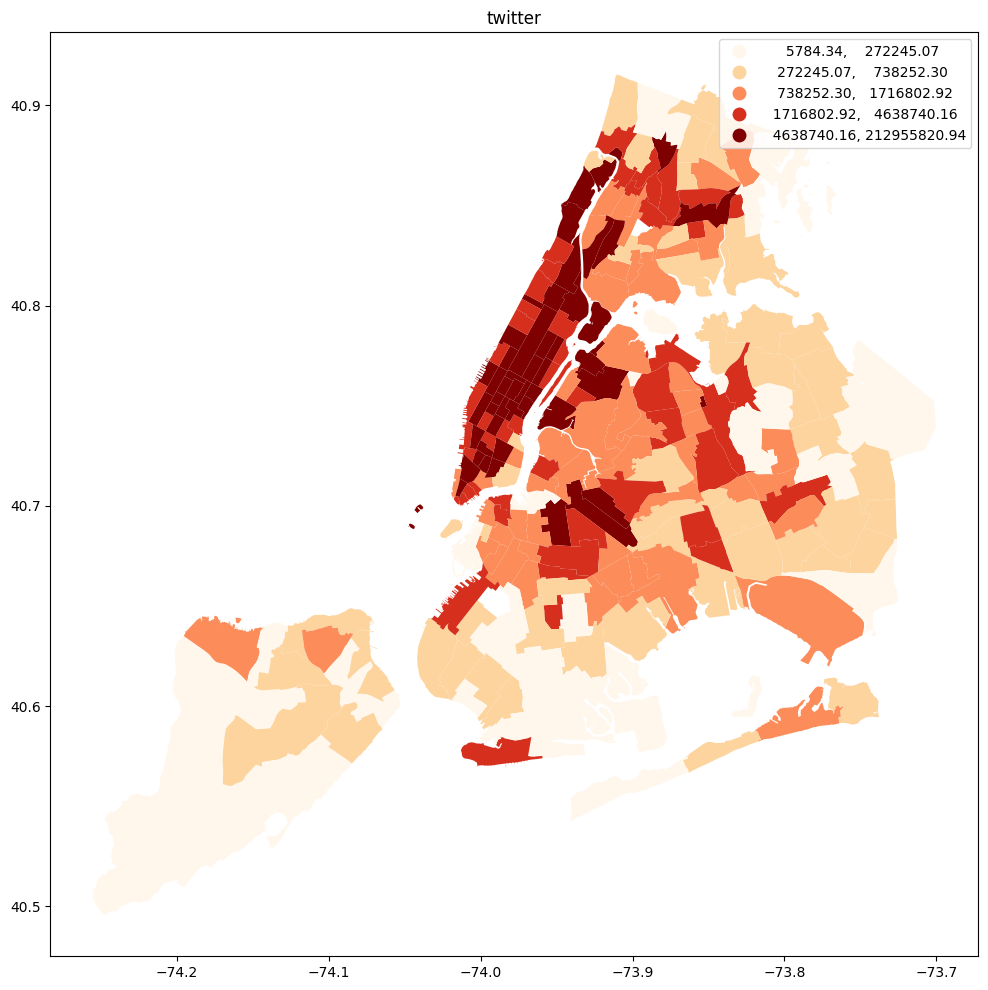

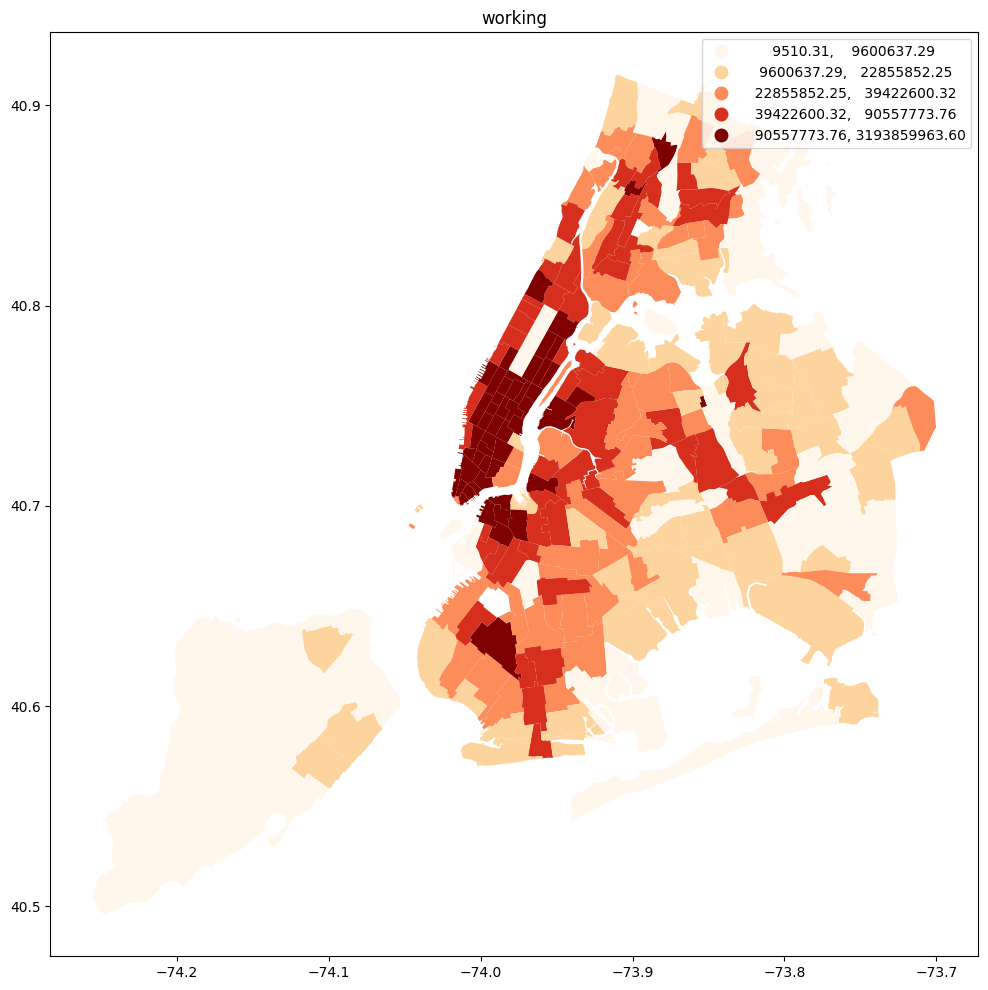

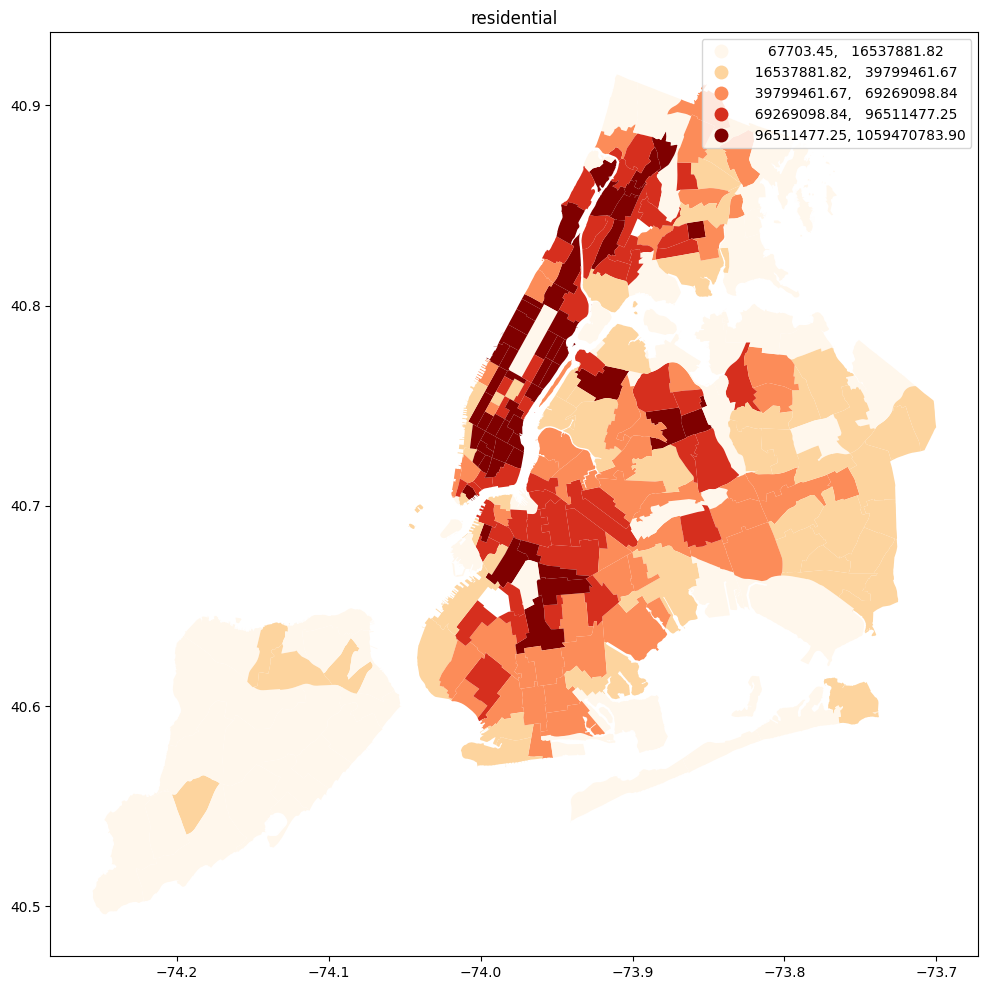

In [ ]:
# # for M in ML:
# #     tzs['X']=tzs[M]/tzs.shape_area
# #     tzs[tzs[M]>0].plot(column='X', scheme='quantiles', legend = True, cmap='OrRd', figsize=(12, 12)).set_title(M)
# !pip install mapclassify
# for M in ML:
#   tzs['X'] = tzs[M] / tzs.shape_area
#   tzs[tzs[M] > 0].plot(column='X', scheme='quantiles', legend=True, cmap='OrRd', figsize=(12, 12)).set_title(M) for population

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


for M in ML:
  tzs['X'] = tzs[M] / tzs.shape_area
  ax = tzs[tzs[M] > 0].plot(column='X', scheme='quantiles', legend=True, cmap='OrRd', figsize=(12, 12))
  ax.set_title(M)
  plt.show()  # Show the plot after each iteration

In [ ]:
#use only taxi, subway and citibike for the clustering analysis
TM=['taxi','subway','citibike']

In [ ]:
#normalize the ridership
normRide=tzs[TM].div(tzs[TM].sum(axis=1), axis=0).dropna()

In [ ]:
tzs2=tzs.merge(normRide,left_index=True, right_index=True, how='inner', suffixes=['','_norm'])

In [ ]:
tzs2.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential,X,taxi_norm,subway_norm,citibike_norm
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",32450.0,109300,0,700,225527.5,31960,480,4989,11398,3.625155e+07,0.124123,0.875877,0.000000
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",27571.0,179644,31545,399,0.0,178515,85,2717,12318,1.101080e+08,0.849829,0.000000,0.150171
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",26482.0,56271,0,490,0.0,3667,40,1191,10751,2.159020e+07,1.000000,0.000000,0.000000
5,0.000606,6,0.150490542523,6,Arrochar/Fort Wadsworth,Staten Island,"MULTIPOLYGON (((-74.06367 40.6022, -74.06351 4...",15896.0,147674,0,255,0.0,7456,88,2495,6729,1.109552e+07,1.000000,0.000000,0.000000
6,0.000390,7,0.107417171123,7,Astoria,Queens,"MULTIPOLYGON (((-73.90414 40.76752, -73.90325 ...",77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048,1.104395e+08,0.097911,0.902089,0.000000



Q1) Cluster the city locations based on taxi/subway/citibike ridership percentage

use taxi/total, subway/total, citibike/total where total = taxi+subway+citibike as the vectors to cluster Use k=4 clusters and the Gausian Mixture algorithm. Visualize the result on the map


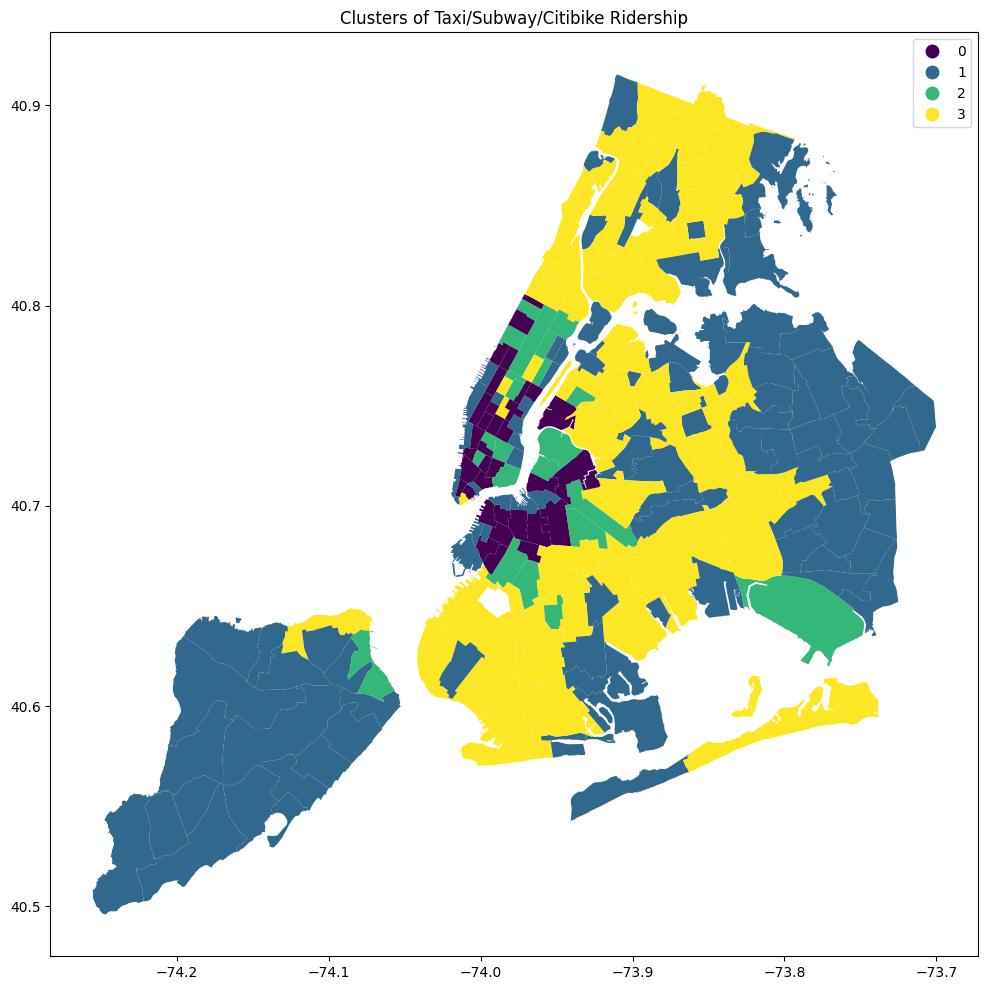

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'normRide' is normalized.
normRide = normRide.div(normRide.sum(axis=1), axis=0)

# Convert to a NumPy array for clustering.
X = normRide.values

# Initialize and fit the Gaussian Mixture Model with k=4 clusters.
gmm = GaussianMixture(n_components=4, random_state=0).fit(X)

# Get the cluster labels for each data point.
labels = gmm.predict(X)

# Add the cluster labels to the GeoDataFrame.
tzs2['cluster'] = labels

# Visualize the clusters on the map.
fig, ax = plt.subplots(figsize=(12, 12))
tzs2.plot(column='cluster', categorical=True, legend=True, cmap='viridis', ax=ax)
ax.set_title('Clusters of Taxi/Subway/Citibike Ridership')
plt.show()

In [ ]:
# Ensure data has the correct columns.
assert all(col in normRide.columns for col in ['taxi', 'subway', 'citibike']), "Missing columns in normRide!"
# Ensure the total adds up to 1 per row.
assert np.allclose(normRide.sum(axis=1), 1), "Normalization error in normRide!"

In [ ]:
print(tzs2['cluster'].value_counts())

cluster
1    100
3     99
0     34
2     22
Name: count, dtype: int64



Q2). Characterize each cluster with its overall mobility decomposition

Compute total usage of each mobility mode within each cluster, get the percentages by mode within the cluster and visualize the results as a bar plot - one bar per cluster colored by the proportions of each mode trips to the total mobility; same way as for the 311 complaints structure in the lab)

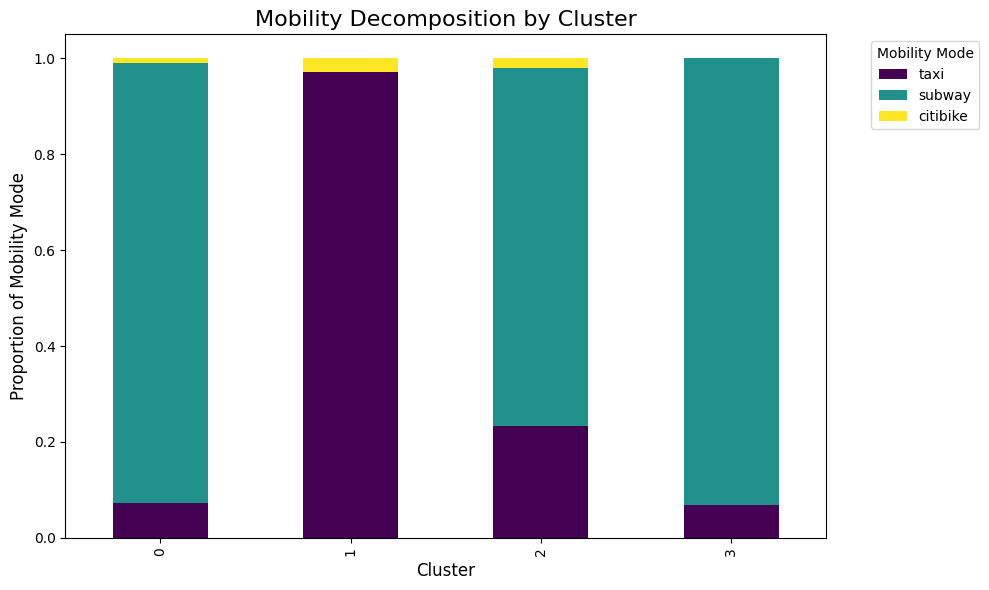

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by cluster and compute the sum of each mobility mode.
cluster_decomposition = (
    tzs2[['cluster']]
    .join(normRide)
    .groupby('cluster')
    .sum()
)

# Normalize to compute the percentage breakdown within each cluster.
cluster_decomposition_percentage = cluster_decomposition.div(cluster_decomposition.sum(axis=1), axis=0)

# Plotting the decomposition as a stacked bar chart.
fig, ax = plt.subplots(figsize=(10, 6))

# Create a stacked bar plot.
cluster_decomposition_percentage.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    ax=ax
)

# Add labels and title.
ax.set_title('Mobility Decomposition by Cluster', fontsize=16)
ax.set_ylabel('Proportion of Mobility Mode', fontsize=12)
ax.set_xlabel('Cluster', fontsize=12)
ax.legend(title='Mobility Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
print(normRide)


         taxi    subway  citibike
2    0.124123  0.875877  0.000000
3    0.849829  0.000000  0.150171
4    1.000000  0.000000  0.000000
5    1.000000  0.000000  0.000000
6    0.097911  0.902089  0.000000
..        ...       ...       ...
258  0.057120  0.934466  0.008414
259  0.039523  0.960477  0.000000
260  0.036796  0.963204  0.000000
261  0.035051  0.961970  0.002978
262  0.960025  0.000000  0.039975

[255 rows x 3 columns]



Homework

Example - learning the probability of school admission based on two exams

In [ ]:
admission = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/admission.csv')
admission.head()

,exam1,exam2,admit
0,34,78,0
1,30,43,0
2,35,72,0
3,60,86,1
4,79,75,1


In [ ]:
admission.shape

(100, 3)

Q1. Run the logistic classifier and SVM for the binary classification of admitted/not admitted student records. Report the model accuracy

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/CUSP2020PUI/Data/master/admission.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Prepare the data (correct column names to lowercase)
X = df[['exam1', 'exam2']]
y = df['admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Report accuracies
print("\nLogistic Regression Accuracy:", log_reg_accuracy)
print("SVM Accuracy:", svm_accuracy)

Dataset Preview:
   exam1  exam2  admit
0     34     78      0
1     30     43      0
2     35     72      0
3     60     86      1
4     79     75      1

Logistic Regression Accuracy: 0.95
SVM Accuracy: 1.0


Q2. Visualize decision boundary for either model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


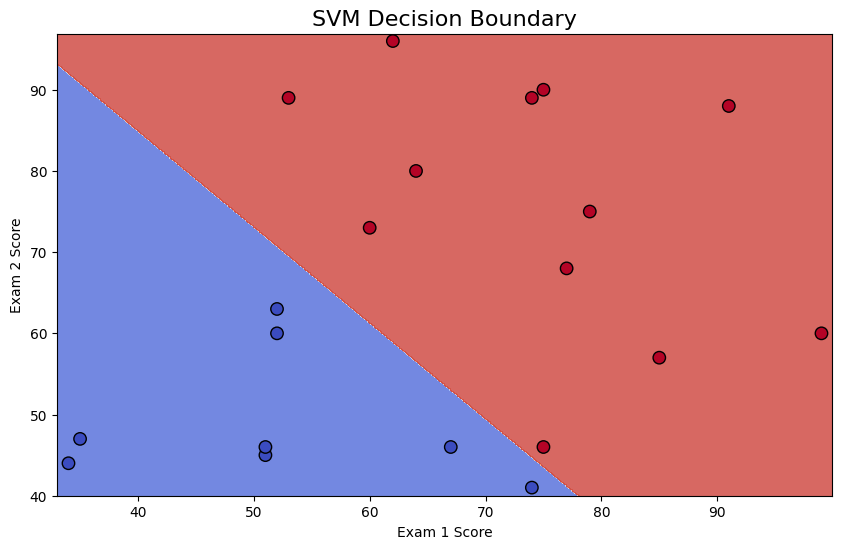

In [3]:
# Visualization of decision boundary for SVM
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_test["exam1"].min() - 1, X_test["exam1"].max() + 1
y_min, y_max = X_test["exam2"].min() - 1, X_test["exam2"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid to determine decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_test["exam1"], X_test["exam2"], c=y_test, edgecolors="k", cmap="coolwarm", s=80)
plt.title("SVM Decision Boundary", fontsize=16)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Q3. Calculate the confusion matrix for each model performance

Dataset Preview:
   exam1  exam2  admit
0     34     78      0
1     30     43      0
2     35     72      0
3     60     86      1
4     79     75      1

Confusion Matrix for Logistic Regression:
[[ 8  0]
 [ 1 11]]


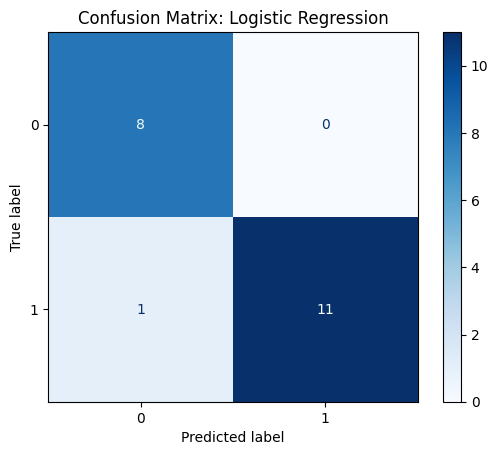


Confusion Matrix for SVM:
[[ 8  0]
 [ 0 12]]


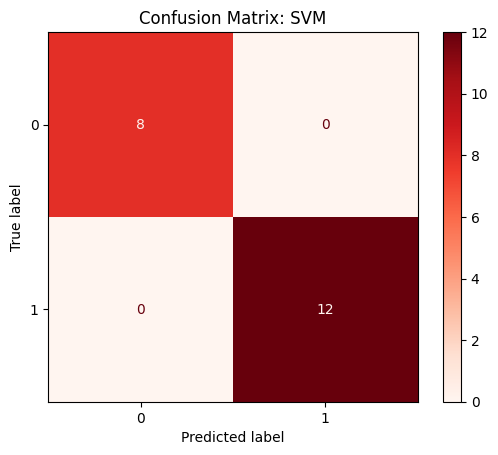

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Load dataset from URL
url = "https://raw.githubusercontent.com/CUSP2020PUI/Data/master/admission.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Prepare the data
X = df[['exam1', 'exam2']]  # Feature columns
y = df['admit']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# SVM Model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
print("\nConfusion Matrix for Logistic Regression:")
print(log_reg_cm)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, display_labels=log_reg.classes_)
disp_log_reg.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:")
print(svm_cm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
disp_svm.plot(cmap="Reds", values_format="d")
plt.title("Confusion Matrix: SVM")
plt.show()


Q4. Predict the probability of acceptance for a student with exam scores 75 and 53 according to logistic regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/CUSP2020PUI/Data/master/admission.csv"
df = pd.read_csv(url)

# Prepare the data
X = df[['exam1', 'exam2']]
y = df['admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# New student's exam scores
new_student = pd.DataFrame({'exam1': [75], 'exam2': [53]})

# Predict the probability of acceptance
acceptance_probability = log_reg.predict_proba(new_student)

print("Probability of Acceptance for a student with exam scores 75 and 53:")
print(f"Not Accepted: {acceptance_probability[0][0]:.2f}, Accepted: {acceptance_probability[0][1]:.2f}")

Probability of Acceptance for a student with exam scores 75 and 53:
Not Accepted: 0.25, Accepted: 0.75


Q5. Train the logistic classifier again but now using only the first 75 records as the training set. Apply the model to the last 25 records and assess the accuracy for those (out-of-sample test)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/CUSP2020PUI/Data/master/admission.csv"
df = pd.read_csv(url)

# Split the data into training and testing sets
train_set = df.iloc[:75]  # First 75 records as training set
test_set = df.iloc[75:]   # Last 25 records as test set

# Prepare training and testing data
X_train = train_set[['exam1', 'exam2']]
y_train = train_set['admit']
X_test = test_set[['exam1', 'exam2']]
y_test = test_set['admit']

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Assess accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the last 25 records (out-of-sample test): {accuracy:.2f}")

Accuracy on the last 25 records (out-of-sample test): 0.84
